In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

## Question 1

### (a)

Text(0.5, 1.0, 'Time Series of z')

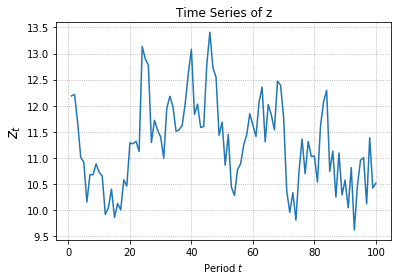

In [21]:
T = 500
sigma = 0.7
unif_vec = sts.uniform.rvs(loc=0, scale=1, size=T, random_state=25)
eps_vec = sts.norm.ppf(unif_vec, loc=0, scale=sigma)

# Generate time series.
rho = 0.85
mu = 11.4
z_t = np.zeros(T+1)
z_t[0] = mu
for i in range(1, T+1):
    z_t[i] = rho * z_t[i-1] + (1 - rho) * mu + eps_vec[i-1]

# Plot the time series. 
plt.plot(np.arange(1,101), z_t[1:101])
plt.grid(b=True, which='major', color='0.65', linestyle=':')
plt.xlabel(r'Period $t$')
plt.ylabel(r'$z_t$', size = 15)
plt.title('Time Series of z')

### (b)

In [22]:
z_vals = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 5)
print(z_vals)

[ 9.3  10.35 11.4  12.45 13.5 ]


### (c)

In [24]:
# Define cutoffs.
z_cuts = 0.5 * z_vals[:-1] + 0.5 * z_vals[1:]

# Transforming continuous variable to five discrete bins.
def transform(series, cuts = z_cuts):
    discrete = np.zeros_like(series)
    for i in range(len(series)):
        if series[i] <= cuts[0]:
            discrete[i] = 1
        elif series[i] <= cuts[1]:
            discrete[i] = 2
        elif series[i] <= cuts[2]:
            discrete[i] = 3
        elif series[i] <= cuts[3]:
            discrete[i] = 4
        else:
            discrete[i] = 5
    return discrete

p_hat = np.zeros((5,5),dtype='float')
z_t_bins = transform(z_t)
for i in range(5):
    for j in range(5):
        for k in range(len(z_t_bins)-1):
            if z_t_bins[k] == i+1 and z_t_bins[k+1] == j+1:
                p_hat[i,j] += 1
for i in range(5):
    p_sum = p_hat[i,:].sum()
    p_hat[i,:] = p_hat[i,:]/p_sum
print('\033[1mP\u0302\033[0m is\n', p_hat)

P̂ is
 [[0.69387755 0.26530612 0.04081633 0.         0.        ]
 [0.09166667 0.55       0.325      0.03333333 0.        ]
 [0.0304878  0.2195122  0.48170732 0.23170732 0.03658537]
 [0.         0.04201681 0.34453782 0.50420168 0.1092437 ]
 [0.         0.         0.04166667 0.35416667 0.60416667]]


### (d)

In [25]:
p3_hat = p_hat @ p_hat @ p_hat
print('The probability of z_{t+3} being in bin 5 given that z_t is in bin 3 today =', p3_hat[2,4])


The probability of z_{t+3} being in bin 5 given that z_t is in bin 3 today = 0.08058689966619678


### (e)

In [43]:
value, vectors = np.linalg.eig(p_hat)
print('eigenvalue =', value)

pn_hat = vectors @ np.diag(np.array([1,0,0,0,0])) @ np.linalg.inv(vectors)
print('The stationary distribution of z_t = \n', pn_hat[0,:])

eigenvalue = [1.         0.76714474 0.57565246 0.37097073 0.12018528]
The stationary distribution of z_t = 
 [0.1045698  0.24154031 0.32373493 0.23529555 0.09485941]


### (f)

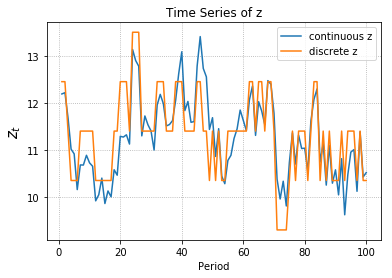

In [49]:
def transform2(p):
    p_new = np.zeros_like(p)
    p_new[:,0] = p[:,0]
    for i in range(1, p.shape[1]):
        p_new[:,i] = p_new[:,i-1] + p[:,i]
    return p_new
new_z_t = np.zeros(T+1)
new_z_t_idx = np.zeros(T+1, dtype = 'int')
new_z_t[0] = z_vals[2]
new_z_t_idx[0] = 2
phat_sum = transform2(p_hat)
for i in range(T):
    cdf_t = phat_sum[new_z_t_idx[i],:]
    new_z_t_idx[i+1] = transform(np.array([unif_vec[i]]), cuts = cdf_t)[0]-1
    new_z_t[i+1] = z_vals[new_z_t_idx[i+1]]

    
plt.plot(np.arange(1,101), z_t[1:101], label = 'continuous z')
plt.grid(b=True, which='major', color='0.65', linestyle=':')
plt.plot(np.arange(1,101), new_z_t[1:101], label = 'discrete z')
plt.xlabel('Period')
plt.ylabel('$z_t$', size = 15)
plt.title('Time Series of z')
plt.legend()